**INTRODUCTION**

This notebook is to be read in conjunction with the phase-1 report about the Home Credit loan defaulter predicition problem hosted on Kaggle.

A brief summary about each model evaluation metric discussed in the report, its implementation from scratch as well as comparison with output of standard libraries follows.

Importing the libraries

In [65]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, precision_recall_curve #Used for checking the correctness of implementation


**Creating the sample dataset for testing out the metric implementations**

A sample binary [0 or 1] dataset with 1000 points for demonstrating the metrics shall be created. The sample shall be created from the Uniform Random Number Generator that generates numbers between 0 and 1. With a treshold value of 0.5, the points with value below treshold shall be labelled 0 and the ones above shall be labelled 1.

This shall be the ground truth data.

In [2]:
random.seed(17)#setting seed for replicating and checking outcomes
gnd_truth=[round(random.random()) for i in range(1000)]#The 'actual' data points or the ground truth

In order to simulate the predicitons of the model, another dataset shall created. Here, I have retained 75% similarity between the ground truth data and the model prediction data, meaning that minimum accuracy shall be 75%. The balance 25% shall be based on the RNG randomization.

I have done this to simulate a fairly proper basic first-cut model's expected output and visualize the metrics better.

In [3]:
random.seed(17)#using same seed
model_proba=[random.random() for i in range(750)]#this ensures that the 750 data points are same
random.seed(21)
model_proba_RNG=[random.random() for i in range(250)]#250 random points for variance, seeded
model_proba.extend(model_proba_RNG)#simulating the probability prediction of a binary classifier model
# this code snippet is for the final classification by simulated model prediction, the y^, so as to say.
y_bar=np.zeros(1000)
for i in range(1000):
  if model_proba[i]>.5:
    y_bar[i]=1
  else:
    y_bar[i]=0

Metric-1 Accuracy

In [55]:
acc=0
for i in range(1000):
  if gnd_truth[i]==y_bar[i]:
    acc+=1
print("The accuracy score of the model is",acc/1000,"based on the built-from-scratch implementation and",accuracy_score(gnd_truth,y_bar),"based on the Scikit learn implementation.\nWe can see that they are the same.")

The accuracy score of the model is 0.876 based on the built-from-scratch implementation and 0.876 based on the Scikit learn implementation.
We can see that they are the same.


Metric-2 Precision

In [56]:
#Precision
true_positives=0
false_positives=0
true_negatives=0
false_negatives=0
for i in range(1000):
  if y_bar[i]==gnd_truth[i] and gnd_truth[i]==1:
    true_positives+=1
  elif y_bar[i]==gnd_truth[i] and gnd_truth[i]==0:
    true_negatives+=1
  elif y_bar[i]!=gnd_truth[i] and gnd_truth[i]==1:
    false_negatives+=1
  else:
    false_positives+=1
  
true_positive_rate=true_positives/(true_positives+false_negatives)
false_positive_rate=false_positives/(true_negatives+false_positives)
true_negative_rate=true_negatives/(true_negatives+false_positives)
false_negative_rate=false_negatives/(true_positives+false_negatives)

confusion_matrix(gnd_truth, y_bar)

precision=true_positives/(true_positives+false_positives)
F1_score=2*precision*recall/(precision+recall)
print("The Precision score of the model is",precision,"based on the built-from-scratch implementation and",precision_score(gnd_truth,y_bar),"based on the Scikit learn implementation.\nWe can see that they are the same.")

The Precision score of the model is 0.8683127572016461 based on the built-from-scratch implementation and 0.8683127572016461 based on the Scikit learn implementation.
We can see that they are the same.


0.871900826446281

Metric-3 Recall

In [59]:
recall=true_positive_rate
print("The Recall score of the model is",recall,"based on the built-from-scratch implementation and",recall_score(gnd_truth,y_bar),"based on the Scikit learn implementation.\nWe can see that they are the same.")

The Recall score of the model is 0.8755186721991701 based on the built-from-scratch implementation and 0.8755186721991701 based on the Scikit learn implementation.
We can see that they are the same.


Metric-4 F1 Score

In [61]:
F1_score=2*precision*recall/(precision+recall)
print("The F1 score of the model is",F1_score,"based on the built-from-scratch implementation and",f1_score(gnd_truth, y_bar),"based on the Scikit learn implementation.\nWe can see that they are the same.")

The F1 score of the model is 0.871900826446281 based on the built-from-scratch implementation and 0.871900826446281 based on the Scikit learn implementation.
We can see that they are the same.


Metric-5 ROC-AUC Score

In [71]:
tpr_fpr_array=[[gnd_truth[i],y_bar[i],model_proba[i]] for i in range(1000)] 
#print(tpr_fpr_array)
tpr_fpr_array_sorted=sorted(tpr_fpr_array,key=lambda x:x[2], reverse=True)
TP_plt=0
TN_plt=0
FP_plt=0
FN_plt=0
TPR_y=[]
FPR_x=[]
precision_y=[]
recall_x=[]
#This nested for loop is for populating the arrays of TPR, FPR for plotting ROC curve and Precision, Recall for plotting PR curve
for i in range(1000):
  TP_plt=0
  TN_plt=0
  FP_plt=0
  FN_plt=0
  treshold=tpr_fpr_array_sorted[i][2]
  for j in range(1000):
    if tpr_fpr_array_sorted[j][2]>=treshold:
      if tpr_fpr_array_sorted[j][0]==1:
        TP_plt+=1
      else:
        FP_plt+=1
    else:
      if tpr_fpr_array_sorted[j][0]==1:
        FN_plt+=1
      else:
        TN_plt+=1
  TPR_y.append(TP_plt/(TP_plt+FN_plt))
  FPR_x.append(FP_plt/(FP_plt+TN_plt))
  precision_y.append(TP_plt/(TP_plt+FP_plt))
  recall_x.append(TP_plt/(TP_plt+FN_plt))

The ROC Curve is as plotted - 


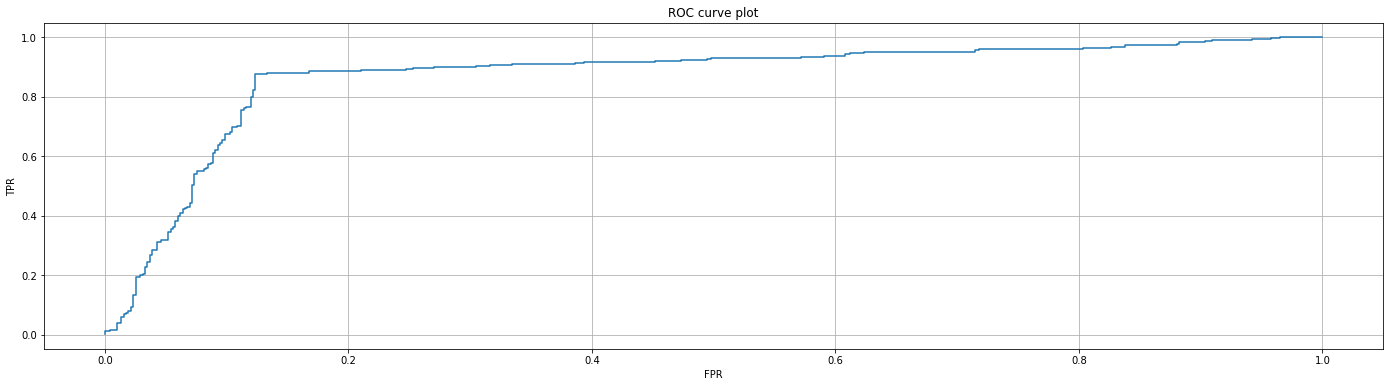


Based on the above plot, the ROC-AUC score of the model is 0.8710208430125442 based on the built-from-scratch implementation and 0.8710208430125441 based on the Scikit learn implementation.
We can see that they are the same.


In [70]:
plt.rcParams['figure.figsize']=(24,6)
plt.plot(FPR_x, TPR_y)
plt.title('ROC curve plot')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.grid()
print("The ROC Curve is as plotted - ")
plt.show()
roc_auc=np.trapz(TPR_y, FPR_x)
print("\nBased on the above plot, the ROC-AUC score of the model is",roc_auc,"based on the built-from-scratch implementation and",roc_auc_score(gnd_truth, model_proba),"based on the Scikit learn implementation.\nWe can see that they are the same.")

Bonus Metric - PR Curve

In [76]:
precision_y_sklearn, recall_x_sklearn, tresholds_AUC=precision_recall_curve(gnd_truth,model_proba)

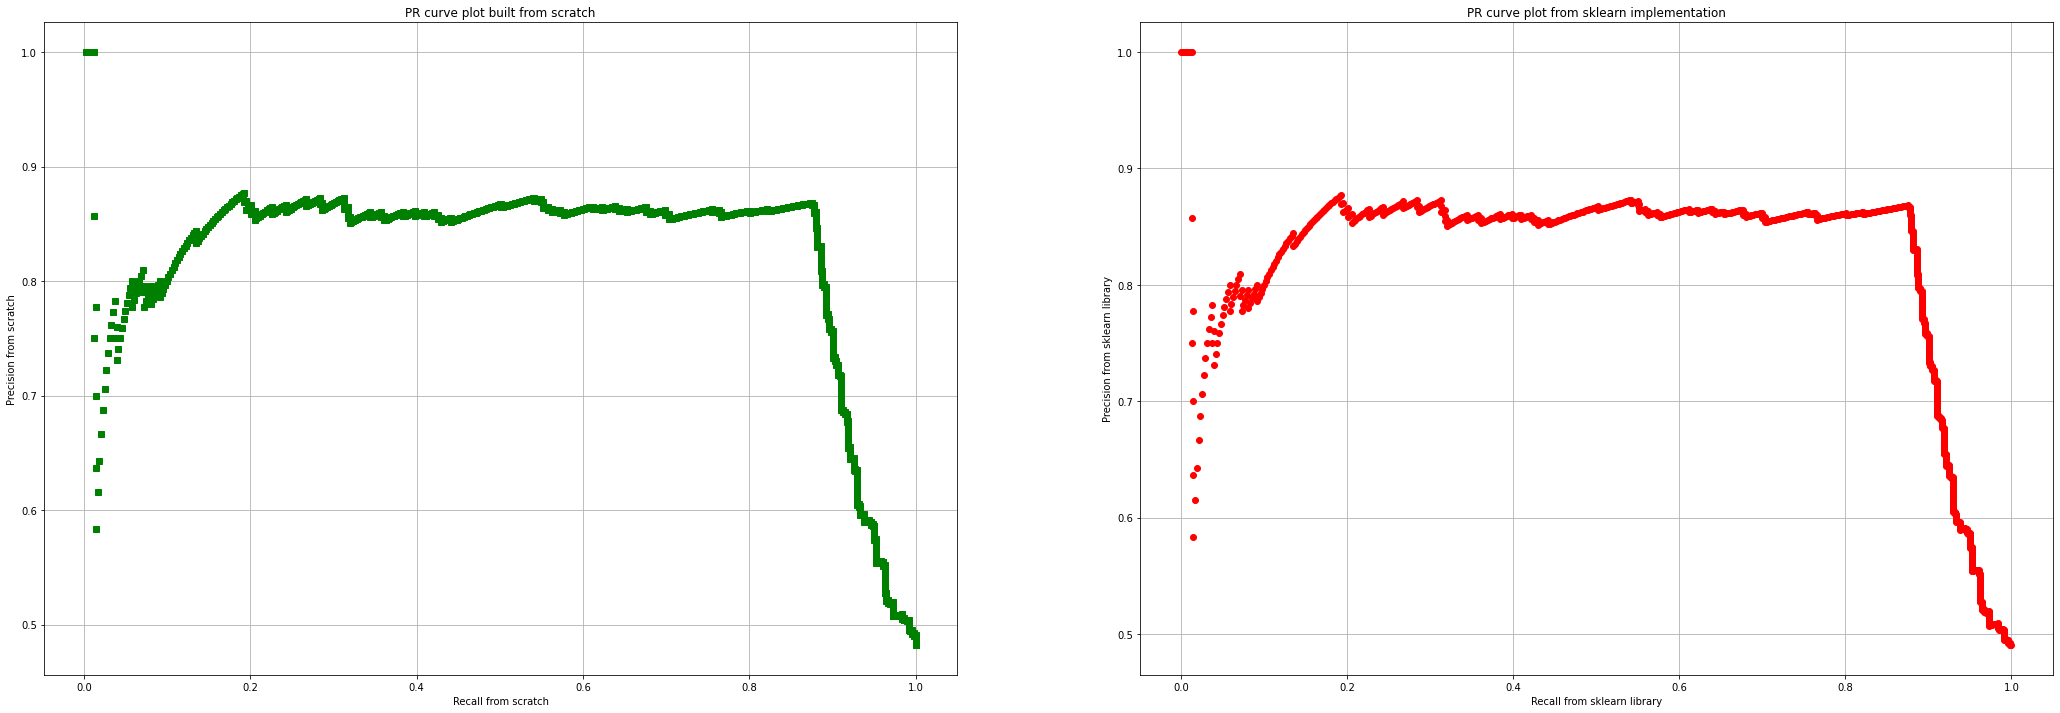


Based on the above plots, we can see that they are quite similar.


In [89]:
plt.rcParams['figure.figsize']=(36,12)
plt.subplot(1, 2, 1)
plt.title('PR curve plot built from scratch')
plt.ylabel('Precision from scratch')
plt.xlabel('Recall from scratch')
plt.grid()
plt.plot(recall_x, precision_y,'gs')
plt.subplot(1, 2, 2)
plt.plot(recall_x_sklearn, precision_y_sklearn,'ro')
plt.title('PR curve plot from sklearn implementation')
plt.ylabel('Precision from sklearn library')
plt.xlabel('Recall from sklearn library')
plt.grid()
plt.show()
print("\nBased on the above plots, we can see that they are quite similar.")